In [1]:
# Cloning the FSOD repository from "Frustratingly Simple Object Detection" paper and navigating to repo #test
!git clone https://github.com/idriswardere/fsod-valorant.git
%cd fsod-valorant
%ls

Cloning into 'fsod-valorant'...
remote: Enumerating objects: 876, done.
remote: Counting objects: 100% (427/427), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 876 (delta 305), reused 308 (delta 291), pack-reused 449
Receiving objects: 100% (876/876), 6.22 MiB | 12.86 MiB/s, done.
Resolving deltas: 100% (504/504), done.
/content/fsod-valorant
configs/   fsdet/              README.md*            valorant-fsod.ipynb
datasets/  FSOD_Project.ipynb  requirements-dev.txt
demo/      LICENSE*            requirements.txt*
docs/      pyproject.toml      tools/


In [2]:
# Installing Detectron2 and other requirements
!pip install git+https://github.com/facebookresearch/detectron2
!python3 -m pip install -r fsod-valorant/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2 to /tmp/pip-req-build-a6m9kwf_
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2 /tmp/pip-req-build-a6m9kwf_
  Resolved https://github.com/facebookresearch/detectron2 to commit ecb786ccd26de4086a6fede437e7d728199470e2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectro

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'fsod-valorant/requirements.txt'


In [3]:
# Import critical libraries
import torch
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

# Import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# Import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.0 ; cuda:  cu118
detectron2: 0.6


In [4]:
# Running pre-trained Faster-RCNN-based model on person.jpg
# !python3 -m demo.demo --confidence-threshold 0.74 --config-file configs/PascalVOC-detection/split1/faster_rcnn_R_101_FPN_base1.yaml --input breach.png --opts MODEL.DEVICE cpu MODEL.WEIGHTS fsdet://voc/split1/base_model/model_final.pth

In [5]:
# Downloading our custom dataset
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="GMQT8YWluuOVof5f1Jnk")
project = rf.workspace("fsodvalorant").project("fsod-valorant")
dataset = project.version(4).download("coco")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=d3850fb85b3479fcd5218883c5201a0b921b4bca947527abf71f8702d59b8515
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to FSOD-Valorant-4 in coco:: 100%|██████████| 206/206 [00:00<00:00, 1059.41it/s]


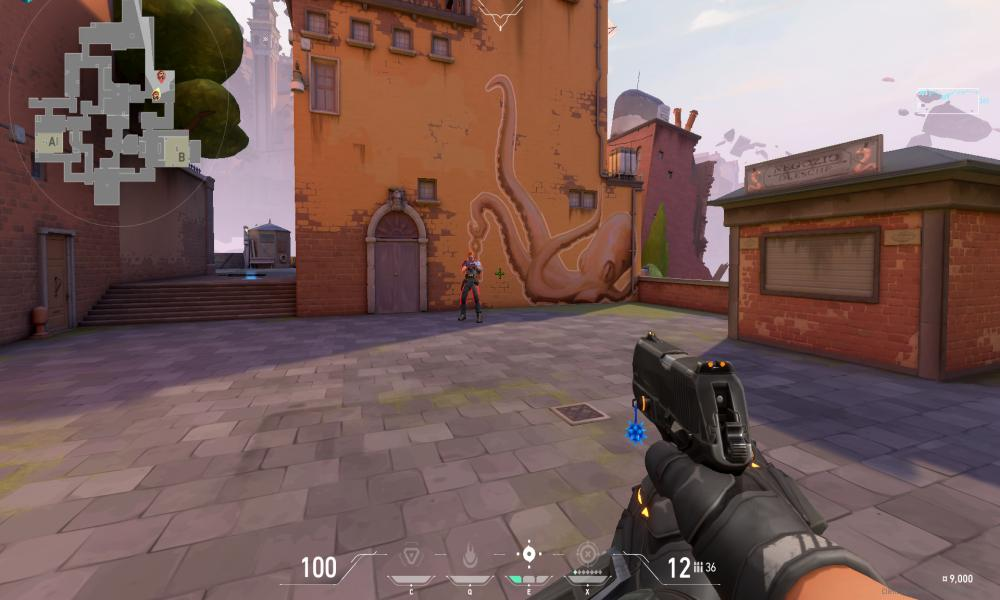

In [6]:
# Show a random image from the custom Valorant dataset
img_path = "FSOD-Valorant-4/test/Valorant-Screenshot-2023-03-27-22-22-15-80_png.rf.94bb19bd9c85c61e109488d5a7b6e8fa.jpg"

im = cv2.imread(img_path)
cv2_imshow(im)

In [7]:
# Setting up a base model predictor and making prediction

config_file_name = "configs/PascalVOC-detection/split1/faster_rcnn_R_101_FPN_base1.yaml"
checkpoint_url_name = "http://dl.yf.io/fs-det/models/voc/split1/base_model/model_final.pth"

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
# Making config
cfg = get_cfg()
cfg.merge_from_file(config_file_name)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.DEVICE = DEVICE
# Feel free to find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = checkpoint_url_name
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

[04/24 23:17:44 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from http://dl.yf.io/fs-det/models/voc/split1/base_model/model_final.pth ...


model_final.pth: 483MB [00:34, 14.0MB/s]                           
torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)


In [8]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([10], device='cuda:0')
Boxes(tensor([[454.7667, 249.9657, 489.0134, 321.2336]], device='cuda:0'))


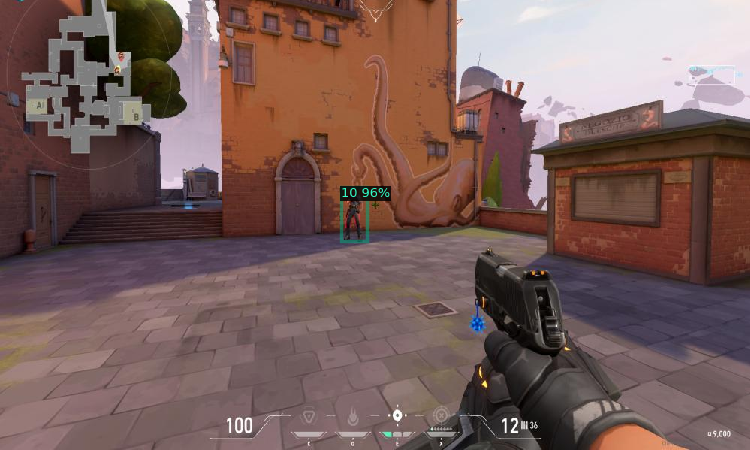

In [9]:
# We can use `Visualizer` to draw the predictions from the base model on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.75)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [10]:
# Registering custom dataset

from detectron2.data.datasets import register_coco_instances

train_valorant_dataset = 'fsod-valorant-4-train'
valid_valorant_dataset = 'fsod-valorant-4-test'

register_coco_instances(train_valorant_dataset, {}, "FSOD-Valorant-4/train/_annotations.coco.json", "FSOD-Valorant-4/train")
register_coco_instances(valid_valorant_dataset, {}, "FSOD-Valorant-4/test/_annotations.coco.json", "FSOD-Valorant-4/test")

In [91]:
# Creating dataloader from custom dataset

from detectron2.data import build_detection_train_loader
from detectron2.data import DatasetMapper
print("!!!", cfg)
batch_size = 1
train_dl = build_detection_train_loader(DatasetCatalog.get(train_valorant_dataset), mapper=DatasetMapper(cfg, is_train=True), total_batch_size=batch_size)
valid_dl = build_detection_train_loader(DatasetCatalog.get(valid_valorant_dataset), mapper=DatasetMapper(cfg, is_train=True, augmentations=[]), total_batch_size=batch_size)

!!! CUDNN_BENCHMARK: False
DATALOADER:
  ASPECT_RATIO_GROUPING: True
  FILTER_EMPTY_ANNOTATIONS: True
  NUM_WORKERS: 4
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: ()
  PROPOSAL_FILES_TRAIN: ()
  TEST: ('voc_2007_test_base1',)
  TRAIN: ('voc_2007_trainval_base1', 'voc_2012_trainval_base1')
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: False
    SIZE: [0.9, 0.9]
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN: (480, 512, 544, 576, 608, 640, 672, 704, 736, 768, 800)
  MIN_SIZE_TRAIN_SAMPLING: choice
  RANDOM_FLIP: horizontal
MODEL:
  ANCHOR_GENERATOR:
    ANGLES: [[-90, 0, 90]]
    ASPECT_RATIOS: [[0.5, 1.0, 2.0]]
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES: [[32], [64], [128], [256], [512]]
  BACKBONE:
    FREEZE_AT: 2
    NAME: build_resnet_fpn_backbon

Instances(num_instances=1, image_height=512, image_width=853, fields=[gt_boxes: Boxes(tensor([[383.8500, 214.1867, 407.7340, 258.1333]])), gt_classes: tensor([5])])


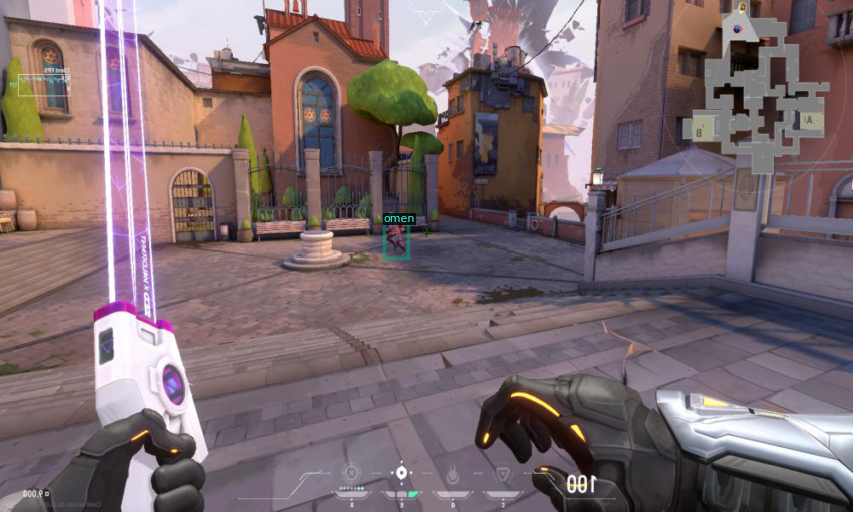

In [61]:
# Making sure the custom dataset is correctly loaded

skip_first = 3 # skip the first k images in batch to visualize k+1th image

for i, x in enumerate(train_dl):
  if i in range(skip_first): continue
  print(x[0]['instances'])
  img = x[0]['image'].numpy().transpose(1, 2, 0)[:, :, ::-1]
  metadata = MetadataCatalog.get(train_valorant_dataset)
  v = Visualizer(img, metadata) # Defining visualizer with image
  target_fields = x[0]["instances"].get_fields()
  labels = [metadata.thing_classes[i] for i in target_fields["gt_classes"]] # Mapping class indices to class names for labels
  vis = v.overlay_instances(  # Creating VisImage made from visualizer with boxes
      labels=labels,
      boxes=target_fields.get("gt_boxes", None),
      )
  cv2_imshow(vis.get_image()[:, :, ::-1])
  break

In [13]:
# Build model from cfg and save the .pth file using a Checkpointer

from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer

model = build_model(cfg)

DetectionCheckpointer(model).load(cfg.MODEL.WEIGHTS)  # load a file, usually from cfg.MODEL.WEIGHTS
checkpointer = DetectionCheckpointer(model, save_dir="./")
checkpointer.save("base_detection_model")

[04/24 23:18:27 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from http://dl.yf.io/fs-det/models/voc/split1/base_model/model_final.pth ...


# Novel Weights Initialization

In [14]:
# Making base model with fresh final layer

!python3 -m tools.ckpt_surgery \
        --src1 ./base_detection_model.pth \
        --method remove \
        --save-dir ./

# save changed ckpt to ./model_reset_remove.pth

save changed ckpt to ./model_reset_remove.pth


In [23]:
!python3 -m tools.train_net --num-gpus 1 \
        --config-file configs/fsod-valorant-detection/valorant-train.yaml \
        --opts MODEL.WEIGHTS ./model_reset_remove.pth

Command Line Args: Namespace(config_file='configs/fsod-valorant-detection/valorant-train.yaml', resume=False, eval_only=False, eval_all=False, eval_during_train=False, eval_iter=-1, start_iter=-1, end_iter=-1, num_gpus=1, num_machines=1, machine_rank=0, dist_url='tcp://127.0.0.1:49152', opts=['MODEL.WEIGHTS', './model_reset_remove.pth'])
[04/25 00:13:36 detectron2]: Rank of current process: 0. World size: 1
[04/25 00:13:36 detectron2]: Command line arguments: Namespace(config_file='configs/fsod-valorant-detection/valorant-train.yaml', resume=False, eval_only=False, eval_all=False, eval_during_train=False, eval_iter=-1, start_iter=-1, end_iter=-1, num_gpus=1, num_machines=1, machine_rank=0, dist_url='tcp://127.0.0.1:49152', opts=['MODEL.WEIGHTS', './model_reset_remove.pth'])
[04/25 00:13:36 detectron2]: Contents of args.config_file=configs/fsod-valorant-detection/valorant-train.yaml:
_BASE_: "../Base-RCNN-FPN.yaml"
MODEL:
  WEIGHTS: "./model_reset_surgery.pth"
  MASK_ON: False
  RESNETS

# (Start of Old) Randinit initialization 


In [16]:
# Making base model with fresh final layer

# Randomly initialize final layer weights 
# Saved as ./model_reset_surgery.pth
!python3 -m tools.ckpt_surgery \
        --src1 ./base_detection_model.pth \
        --method randinit \
        --save-dir ./

# New model with randomly initialized final layer (with the 20 VOC classes)
# Making config
cfg_ri = get_cfg()
cfg_ri.merge_from_file(config_file_name)
cfg_ri.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1  # set threshold for this model
cfg_ri.MODEL.DEVICE = DEVICE
cfg_ri.MODEL.WEIGHTS = "./model_reset_surgery.pth"
predictor_ri = DefaultPredictor(cfg_ri)
outputs_ri = predictor_ri(im)

save changed ckpt to ./model_reset_surgery.pth
[04/24 23:18:46 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./model_reset_surgery.pth ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


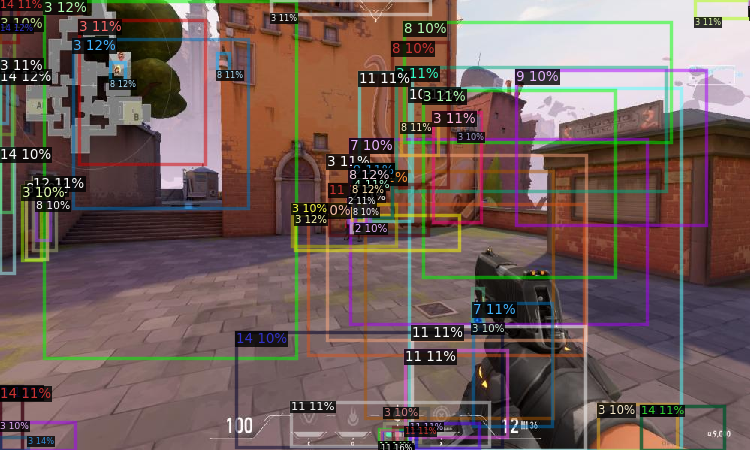

In [17]:
# Getting outputs on model with random initialization on final layer (should suck)
# print(outputs_ri["instances"].pred_classes)
# print(outputs_ri["instances"].pred_boxes)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.75)
out = v.draw_instance_predictions(outputs_ri["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [18]:
# Begin fine-tuning training stage on custom Valorant dataset
#0.01 lr
!python3 -m tools.train_net --num-gpus 1 \
       --config-file configs/fsod-valorant-detection/faster_rcnn_R_101_FPN_ft_fc_all1_10shot.yaml \
        --opts MODEL.WEIGHTS ./model_reset_surgery.pth

Command Line Args: Namespace(config_file='configs/fsod-valorant-detection/faster_rcnn_R_101_FPN_ft_fc_all1_10shot.yaml', resume=False, eval_only=False, eval_all=False, eval_during_train=False, eval_iter=-1, start_iter=-1, end_iter=-1, num_gpus=1, num_machines=1, machine_rank=0, dist_url='tcp://127.0.0.1:49152', opts=['MODEL.WEIGHTS', './model_reset_surgery.pth'])
[04/24 23:18:49 detectron2]: Rank of current process: 0. World size: 1
[04/24 23:18:49 detectron2]: Command line arguments: Namespace(config_file='configs/fsod-valorant-detection/faster_rcnn_R_101_FPN_ft_fc_all1_10shot.yaml', resume=False, eval_only=False, eval_all=False, eval_during_train=False, eval_iter=-1, start_iter=-1, end_iter=-1, num_gpus=1, num_machines=1, machine_rank=0, dist_url='tcp://127.0.0.1:49152', opts=['MODEL.WEIGHTS', './model_reset_surgery.pth'])
[04/24 23:18:49 detectron2]: Contents of args.config_file=configs/fsod-valorant-detection/faster_rcnn_R_101_FPN_ft_fc_all1_10shot.yaml:
_BASE_: "../Base-RCNN-FPN.y

# (End of Old)

In [37]:
# Evaluate the model

!python3 -m tools.test_net --num-gpus 1 \
        --config-file configs/fsod-valorant-detection/valorant-test.yaml \
        --eval-only \
        --opts MODEL.WEIGHTS ./checkpoints/model_final.pth

Command Line Args: Namespace(config_file='configs/fsod-valorant-detection/valorant-test.yaml', resume=False, eval_only=True, eval_all=False, eval_during_train=False, eval_iter=-1, start_iter=-1, end_iter=-1, num_gpus=1, num_machines=1, machine_rank=0, dist_url='tcp://127.0.0.1:49152', opts=['MODEL.WEIGHTS', './checkpoints/model_final.pth'])
[04/25 13:09:46 detectron2]: Rank of current process: 0. World size: 1
[04/25 13:09:46 detectron2]: Command line arguments: Namespace(config_file='configs/fsod-valorant-detection/valorant-test.yaml', resume=False, eval_only=True, eval_all=False, eval_during_train=False, eval_iter=-1, start_iter=-1, end_iter=-1, num_gpus=1, num_machines=1, machine_rank=0, dist_url='tcp://127.0.0.1:49152', opts=['MODEL.WEIGHTS', './checkpoints/model_final.pth'])
[04/25 13:09:46 detectron2]: Contents of args.config_file=configs/fsod-valorant-detection/valorant-test.yaml:
_BASE_: "../Base-RCNN-FPN.yaml"
MODEL:
  WEIGHTS: "./checkpoints/model_final.pth"
  MASK_ON: False


In [97]:
# Creating fine-tuned model from checkpoint

#ft_config_file_name = config_file_name
#print(config_file_name)
ft_config_file_name = "configs/fsod-valorant-detection/valorant-test.yaml"

cfg_ft = get_cfg()
cfg_ft.merge_from_file(ft_config_file_name)
cfg_ft.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.15  # set threshold for this model
cfg_ft.MODEL.DEVICE = DEVICE
cfg_ft.MODEL.WEIGHTS = "./checkpoints/model_final.pth"

[04/25 13:59:09 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./checkpoints/model_final.pth ...
------------
Highest Confidence Classification: sova
Confidence: tensor(0.2312, device='cuda:0')
------------


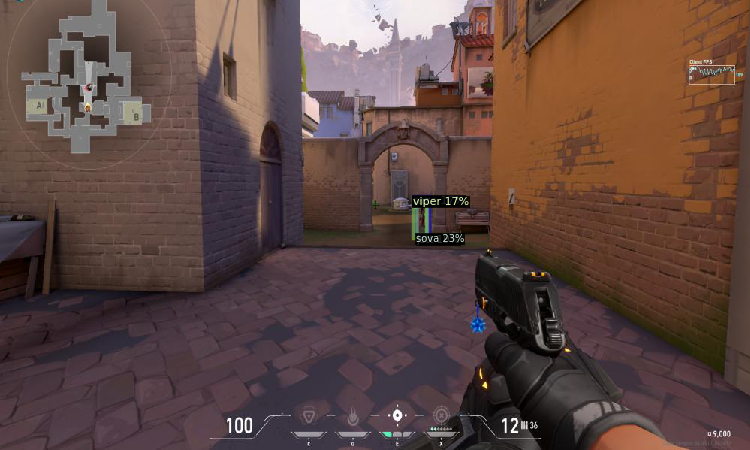

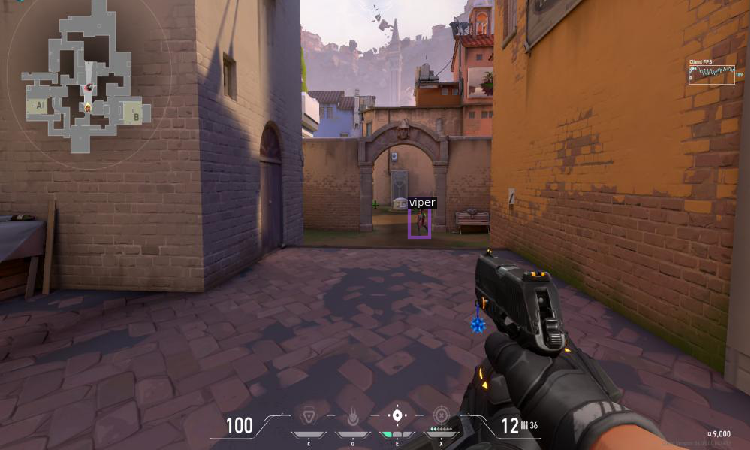

In [110]:
# Visualizing results of model fine-tuned on custom Valorant data versus ground truth

skip_first = 1 # skip the first k images in batch to see results on k+1th image
img = None
for i, x in enumerate(valid_dl):
  if i in range(skip_first): continue
  #print(x[0].keys())
  img = x[0]['image'].numpy().transpose(1, 2, 0)[:, :, ::-1]
  break

predictor_ft = DefaultPredictor(cfg_ft)
outputs_ft = predictor_ft(img)

# print(outputs_ft["instances"].pred_classes)
# print(outputs_ft["instances"].pred_boxes)
#print(outputs_ft['instances'])

# Finding highest confidence classification
#print(outputs_ft['instances'].scores)
if len(outputs_ft['instances'].scores) > 0:
  best_class_index = torch.argmax(outputs_ft['instances'].scores)
  best_confidence = outputs_ft['instances'].scores[best_class_index]
  best_class_id = outputs_ft['instances'].pred_classes[best_class_index]
  metadata = MetadataCatalog.get(valid_valorant_dataset)
  best_class = metadata.thing_classes[best_class_id]
  print("------------")
  print("Highest Confidence Classification:", best_class)
  print("Confidence:", best_confidence)
  print("------------")

v = Visualizer(img, MetadataCatalog.get(cfg_ft.DATASETS.TRAIN[0]), scale=0.75)
out = v.draw_instance_predictions(outputs_ft["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

#ground truth
for i, x in enumerate(valid_dl):
  if i in range(skip_first): continue
  #print(x[0]['instances'])
  #print(x[0])
  img = x[0]['image'].numpy().transpose(1, 2, 0)[:, :, ::-1]
  metadata = MetadataCatalog.get(valid_valorant_dataset)
  v = Visualizer(img, metadata, scale=0.75) # Defining visualizer with image
  target_fields = x[0]["instances"].get_fields()
  labels = [metadata.thing_classes[i] for i in target_fields["gt_classes"]] # Mapping class indices to class names for labels
  vis = v.overlay_instances(  # Creating VisImage made from visualizer with boxes
      labels=labels,
      boxes=target_fields.get("gt_boxes", None),
      )
  cv2_imshow(vis.get_image()[:, :, ::-1])
  break